# Data Summaries
**Numerical summaries** and **graphs of the data** are very helpful for data reduction. The information that
they convey can assist in combining categories of a categorical variable, in choosing variables to
remove, in assessing the level of information overlap between variables, and more.

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

In [8]:
bostonHousing_df = pd.read_csv('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT.MEDV': 'CAT_MEDV'})
bostonHousing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


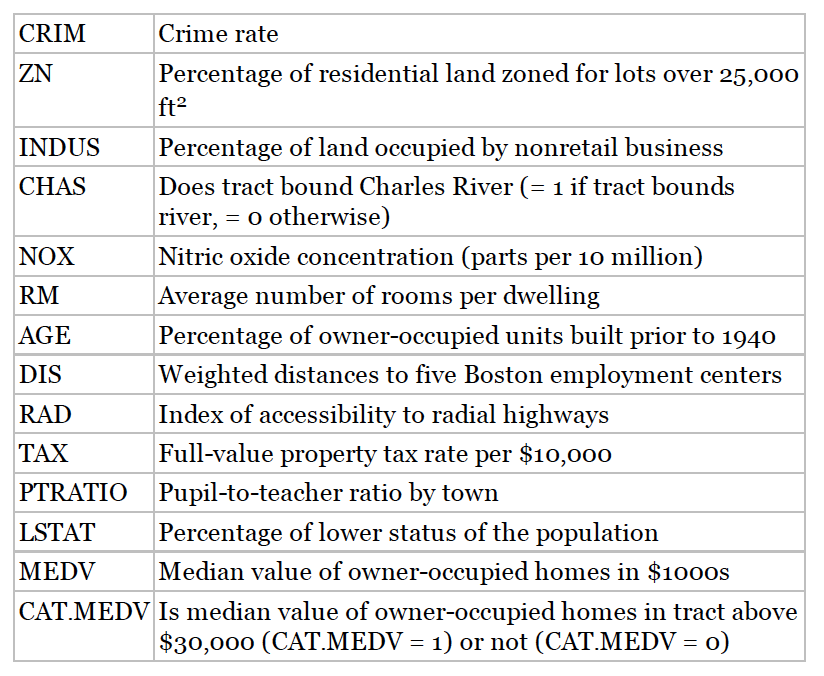

In [4]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image('BostonHousing_description.png')

In [5]:
bostonHousing_df.describe()
# Compute mean, standard deviation, min, max, median, length, and missing values of
# CRIM
print('Mean : ', bostonHousing_df.CRIM.mean())
print('Std. dev : ', bostonHousing_df.CRIM.std())
print('Min : ', bostonHousing_df.CRIM.min())
print('Max : ', bostonHousing_df.CRIM.max())
print('Median : ', bostonHousing_df.CRIM.median())
print('Length : ', len(bostonHousing_df.CRIM))
print('Number of missing values : ', bostonHousing_df.CRIM.isnull().sum())

Mean :  3.6135235573122535
Std. dev :  8.601545105332487
Min :  0.00632
Max :  88.9762
Median :  0.25651
Length :  506
Number of missing values :  0


In [6]:
# Compute mean, standard dev., min, max, median, length, and missing values for all variables
pd.DataFrame({'mean': bostonHousing_df.mean(),
    'sd': bostonHousing_df.std(),
    'min': bostonHousing_df.min(),
    'max': bostonHousing_df.max(),
    'median': bostonHousing_df.median(),
    'length': len(bostonHousing_df),
    'miss.val': bostonHousing_df.isnull().sum(),
})

,mean,sd,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


In [9]:
#Correlation table for Boston Housing data
bostonHousing_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


In [10]:
#Number of neighborhoods that bound the Charles River vs. those that do not
bostonHousing_df.CHAS.value_counts() #CHAS 는 0과 1뿐임

0    471
1     35
Name: CHAS, dtype: int64

In [11]:
#Average MEDV by CHAS and RM (using groupby())

# Create bins of size 1 for variable using the method pd.cut. 
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)
bostonHousing_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

In [25]:
#Average MEDV by CHAS and RM (using pivot_table())
#Another useful method is pivot_table() in the pandas package, that allows the creation of pivot tables by reshaping the data by the aggregating variables of our choice.

bostonHousing_df = pd.read_csv('BostonHousing.csv')
# create bins of size 1
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)
# use pivot_table() to reshape data and generate pivot table
pd.pivot_table(bostonHousing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'],
aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


# Correlation Analysis

In datasets with a large number of variables (which are likely to serve as predictors), there is usually
much overlap in the information covered by the set of variables. 

1. One simple way to find redundancies is to look at a **correlation matrix**. 
This shows all the pairwise correlations between variables. Pairs that have a **very strong (positive or negative) correlation contain a lot of overlap** in information and are good candidates for data reduction by removing one of the variables. 

2. **Correlation analysis** is also a good method for detecting duplications of variables in the data.
Sometimes, the same variable appears accidentally more than once in the dataset (under a different name) because the dataset was merged from multiple sources, the same phenomenon is measured in different units, and so on. Using correlation table heatmaps, as shown in Chapter 3, can make the task of identifying strong correlations easier.

In [28]:
# use method crosstab to create a cross-tabulation of two variables
tbl = pd.crosstab(bostonHousing_df['CAT. MEDV'], bostonHousing_df.ZN)
tbl

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT. MEDV,,,,,,,,,,,,,,,,,,,,,
0,339,10,0,1,5,4,9,10,3,6,...,2,3,3,1,10,1,2,0,0,0
1,33,0,1,0,16,0,1,0,0,0,...,1,1,0,2,5,1,0,5,4,1


In [29]:
# convert numbers to ratios
propTbl = tbl / tbl.sum()
propTbl.round(2)

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT. MEDV,,,,,,,,,,,,,,,,,,,,,
0,0.91,1.0,0.0,1.0,0.24,1.0,0.9,1.0,1.0,1.0,...,0.67,0.75,1.0,0.33,0.67,0.5,1.0,0.0,0.0,0.0
1,0.09,0.0,1.0,0.0,0.76,0.0,0.1,0.0,0.0,0.0,...,0.33,0.25,0.0,0.67,0.33,0.5,0.0,1.0,1.0,1.0


<ipython-input-30-a95aaf29646d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([':,.0%'.format(x) for x in ax.get_yticks()])


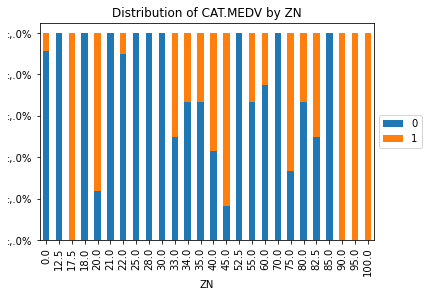

In [30]:
# plot the ratios in a stacked bar chart
ax = propTbl.transpose().plot(kind='bar', stacked=True)
ax.set_yticklabels([':,.0%'.format(x) for x in ax.get_yticks()])
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Reducing the Number of Categories in Categorical Variables

When a categorical variable has many categories, and this variable is destined to be a predictor, many
data mining methods will require converting it into many dummy variables. In particular, a variable
with m categories will be transformed into either m or m − 1 dummy variables (depending on the
method). This means that even if we have very few original categorical variables, they can greatly
inflate the dimension of the dataset. 
범주형 변수에 많은 범주가 있고 이 변수가 예측 변수가 될 경우, 많은 데이터 마이닝 방법은 많은 더미 변수로 변환해야 합니다. 특히, m 범주의 변수는 (방법에 따라) m 또는 m - 1 더미 변수로 변환된다. 이것은 비록 우리가 원래의 범주형 변수를 거의 가지고 있지 않더라도, 그것들은 데이터 세트의 차원을 크게 부풀릴 수 있다는 것을 의미한다.

One way to handle this is to reduce the number of categories by combining close or similar categories. Combining categories requires incorporating expert knowledge and common sense. Pivot tables are useful for this task.

# Converting a Categorical Variable to a Numerical Variable

# Principal Components Analysis

Principal components analysis (PCA) is a useful method for dimension reduction, especially when the
number of variables is large. PCA is especially valuable when we have subsets of measurements that
are measured on the same scale and are highly correlated. In that case, it provides a few variables
(often as few as three) that are weighted linear combinations of the original variables, and that retain
the majority of the information of the full original set. PCA is intended for use with numerical
variables. For categorical variables, other methods such as correspondence analysis are more suitable.

주성분 분석(PCA)은 특히 변수의 수가 많은 경우 차원 축소에 유용한 방법입니다. PCA는 동일한 척도로 측정되고 상관 관계가 높은 측정값의 하위 집합이 있을 때 특히 유용합니다. 

# Dimension Reduction Using Regression Models

Another approach to reducing the number of predictors,
which directly considers the predictive or classification task, is by fitting a regression model. For
prediction, a linear regression model is used (see Chapter 6) and for classification, a logistic regression
model (see Chapter 10).

# Dimension Reduction Using Classification and Regression Trees

Another method for reducing the number of columns and for combining categories of a categorical
variable is by applying classification and regression trees (see Chapter 9).

## 추가: PCA 예시

주의사항: PCA is intended for use with numerical variables.


We focus first on two variables: **calories** and **consumer rating**. The idea in PCA is to find a linear combination of the two variables that contains most, even if not all, of the information, so that this new variable can replace the two original variables.

The line z1 is the direction in which the variability of the points is largest. It is the line that captures the most variation in the data if we decide to reduce the dimensionality of the data from two to one. Among all possible lines, it is the line for which, if we project the points in the dataset orthogonally to get a set of 77 (one-dimensional) values, the variance of the z1 values will be maximum. This is called the first principal component. It is also the line that minimizes the sum-of-squared perpendicular distances from the line. The z2-axis is chosen to be perpendicular to the z1-axis. In the case of two variables, there is only one line that is perpendicular to z1, and it has the second largest variability, but its information is uncorrelated with z1. This is called the second principal component. In general, when we have more than two variables, once we find the direction z1 with the largest variability, we search among all the orthogonal directions to z1 for the one
with the next-highest variability. That is z2. The idea is then to find the coordinates of these lines and to see how they redistribute the variability.

z1 선은 점의 변동성이 가장 큰 방향입니다. 데이터의 차원성을 2에서 1로 줄이기로 결정한 경우 데이터에서 가장 많은 변동을 포착하는 선입니다. 가능한 모든 라인 중에서 77(1차원) 값의 집합을 얻기 위해 데이터 세트의 포인트를 직교로 투영할 경우 z1 값의 분산이 최대가 되는 라인이다. 이를 첫 번째 주성분이라고 합니다. 또한 선으로부터의 수직 거리 제곱의 합을 최소화하는 선이기도 합니다. z2 축은 z1 축에 수직이 되도록 선택됩니다. 두 변수의 경우 z1에 수직인 선이 하나뿐이고 변동성이 두 번째로 크지만, 그 정보는 z1과 상관 관계가 없습니다. 이를 두 번째 주성분이라고 합니다. 일반적으로 변수가 세 개 이상일 때, 가장 큰 변동성을 갖는 방향 z1을 찾으면, 우리는 z1에 대한 모든 직교 방향 중에서 하나를 찾는다.
그 다음으로 높은 변동성을 가지고 있습니다. 이것은 z2입니다. 그런 다음 이 선들의 좌표를 찾고 이 선들이 어떻게 변동성을 재분배하는지 보는 것입니다.

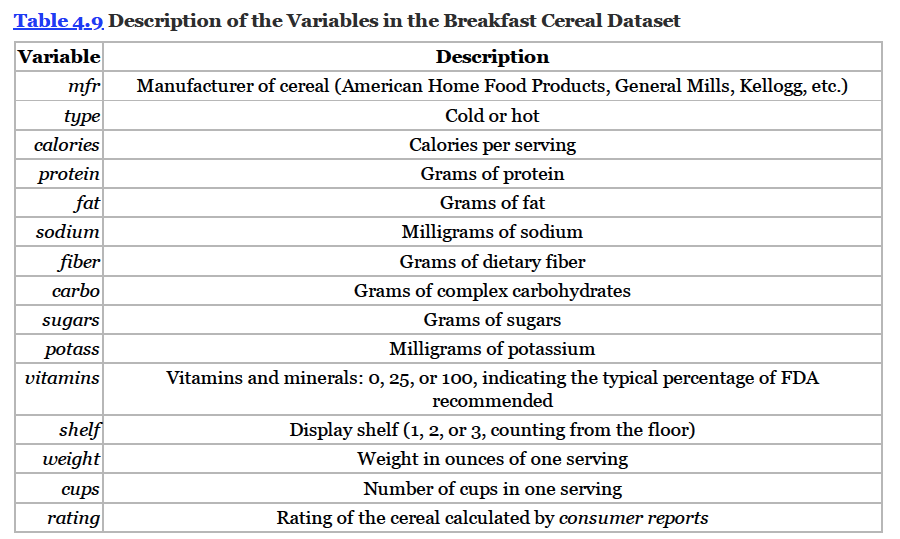

In [31]:
Image('Cereals_description.png')

In [33]:
#PCA on the two variables calories and rating
cereals_df = pd.read_csv('Cereals.csv')
pcs = PCA(n_components=2)
pcs.fit(cereals_df[['calories', 'rating']])
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
'Proportion of variance': pcs.explained_variance_ratio_,
'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary.round(4)
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=['PC1', 'PC2'], index=['calories', 'rating'])
pcsComponents_df
scores = pd.DataFrame(pcs.transform(cereals_df[['calories', 'rating']]), columns=['PC1', 'PC2'])
scores.head()

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686
